<h1>Google App Rating(popularity) Prediction</h1>

<h4>In this Python notebook, we will work on a machine learning algorithm (Keras Model-lstm)that receives the title of an app along with its description and predicts its popularity (rating) from 1 to 5. This will help App developer to keep add features before sending it to the store</h4>

<ul>
<li>Title: Application name</li>
<li>Url: Application url</li>
<li>Store_rating: Overall user rating of the app (as when scraped)</li>
<li>Reviews: Number of user reviews for the app (as when scraped)</li>
<li>Downloads: Number of user downloads for the app</li>
<li>Price: Paid or Free</li>
<li>Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult/ Teen</li>
<li>Genre: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.</li>
</ul>

<h2>Data Summary</h2>

In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import calendar

%matplotlib inline
sns.set()

In [2]:
# Load the data set
import json
import pandas as pd
with open('app_ranking.json') as table:
    data = json.load(table) 
df = pd.DataFrame(data,columns=['url','title','description','store_rating','price','genre','content_rating','downloads','reviews']) 

In [3]:
# Print first few rows from data
df.head()

,url,title,description,store_rating,price,genre,content_rating,downloads,reviews
0,https://play.google.com/store/apps/details?id=...,WWE SuperCard,Get ready to dominate them all with Season 3 o...,4.3,0,Sports,Teen,"5,000,000 - 10,000,000",406297
1,https://play.google.com/store/apps/details?id=...,Candy Crush Saga,"Candy Crush Saga, from the makers of Candy Cru...",4.4,0,Casual,Everyone,"500,000,000 - 1,000,000,000",17857602
2,https://play.google.com/store/apps/details?id=...,Clash Royale,Enter the Arena! From the creators of Clash of...,4.5,0,Strategy,Everyone 10+,"100,000,000 - 500,000,000",12850896
3,https://play.google.com/store/apps/details?id=...,Cookie Crush Match 3,Play and enjoy Cookie Crush Match 3 game for f...,4.3,0,Casual,Everyone,"10,000,000 - 50,000,000",54616
4,https://play.google.com/store/apps/details?id=...,InstaBeauty -Makeup Selfie Cam,InstaBeauty：Great Selfie photo Editor for Inst...,4.2,0,Photography,Everyone,"50,000,000 - 100,000,000",499379


In [4]:
# Shape of data 
df.shape

(348734, 9)

In [5]:
# Basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348734 entries, 0 to 348733
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url             348734 non-null  object 
 1   title           348734 non-null  object 
 2   description     348734 non-null  object 
 3   store_rating    348734 non-null  float64
 4   price           348734 non-null  int64  
 5   genre           348734 non-null  object 
 6   content_rating  348734 non-null  object 
 7   downloads       348734 non-null  object 
 8   reviews         348734 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 23.9+ MB



<p class="alert alert-block alert-success"> There is no missing values in our dat aset

In [6]:
# Describing our data
df.describe()

,store_rating,price,reviews
count,348734.000000,348734.0,3.487340e+05
mean,4.086998,0.0,7.747421e+02
std,0.803789,0.0,5.145917e+04
min,1.000000,0.0,1.000000e+00
25%,3.700000,0.0,3.000000e+00
50%,4.200000,0.0,1.100000e+01
75%,4.700000,0.0,5.600000e+01
max,5.000000,0.0,1.785760e+07



<p class="alert alert-block alert-success"> All application we have in the data it's free and the store rating range from 1 to 5

<h2>Exploratory data analysis (EDA)</h2>



Here we use pandas profilling to analyse whole set of data. Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.


In [7]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

<AxesSubplot:>

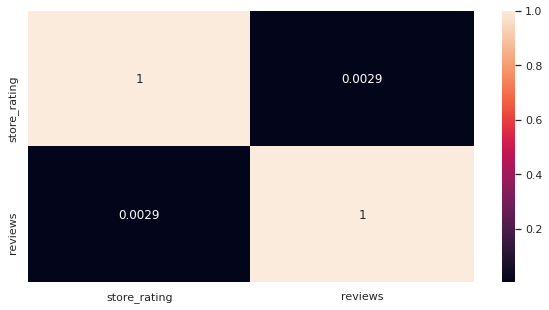

In [8]:
# to check Multicollinearity 
fig = plt.figure(figsize=[10,5])
cols = ['store_rating', 'reviews']
sns.heatmap(df.loc[:,cols].corr(),annot=True,vmax=1)


<p class="alert alert-block alert-success"> There is no Multicollinearity between the features

In [9]:
df['content_rating'].value_counts()

Everyone           265090
Unrated             52164
Teen                21918
Mature 17+           4905
Everyone 10+         4634
Adults only 18+        22
全ユーザー対象                 1
Name: content_rating, dtype: int64


<p class="alert alert-block alert-success"> There is one sample that has a specific type which is "everyone" but in Chinese, maybe this sample cause an issue, so we will delete it

In [10]:
df[df['content_rating'] == "全ユーザー対象" ]

,url,title,description,store_rating,price,genre,content_rating,downloads,reviews
176123,https://play.google.com/store/apps/details?hl=ja,マイ・コスメ・ヒストリ★自分の化粧品を評価して管理する★,たくさん持ってる化粧品!いちいち面倒な入力したくない！ 口コミは、あくまで参考！自分で使って...,3.7,0,ライフスタイル,全ユーザー対象,"500～1,000",3


In [11]:
df=df.drop(176123)

Text(0.5, 1.0, 'Count of application according to category')

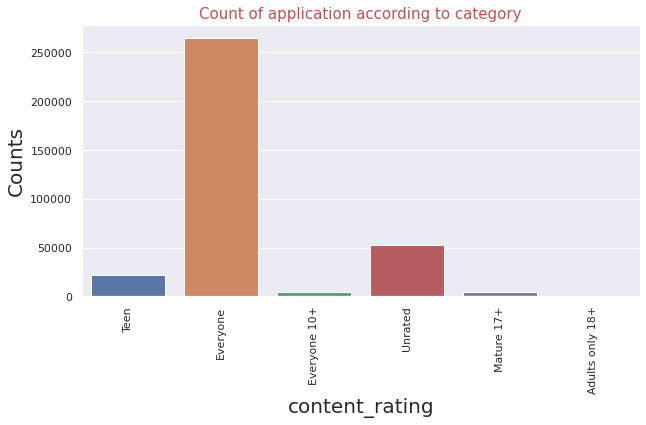

In [12]:
# count of application according to category
plt.figure(figsize=(10, 5))
sns.countplot(x='content_rating', data=df)
plt.xticks(rotation=90)
plt.xlabel('content_rating', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Count of application according to category', fontsize=15, color='r')


<p class="alert alert-block alert-success"> The "Everyone" category has the most users

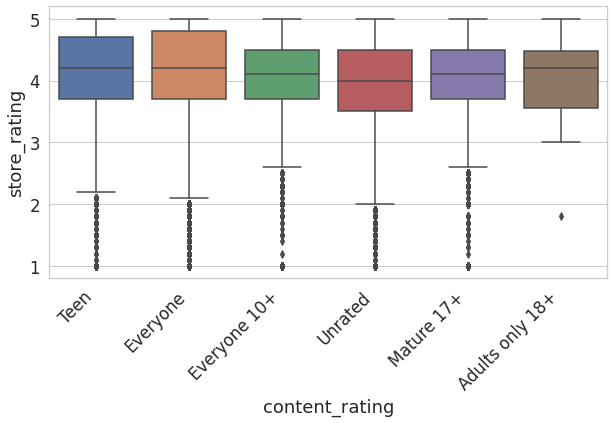

In [13]:
# plot the categories have the best overall rating
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="content_rating",y="store_rating",data=df)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')


In [14]:
df['genre'].value_counts().head(10)

Entertainment        27296
Education            26358
Tools                23175
Lifestyle            21219
Personalization      17718
Business             17043
Music & Audio        16967
Books & Reference    16130
Puzzle               14893
Casual               14871
Name: genre, dtype: int64

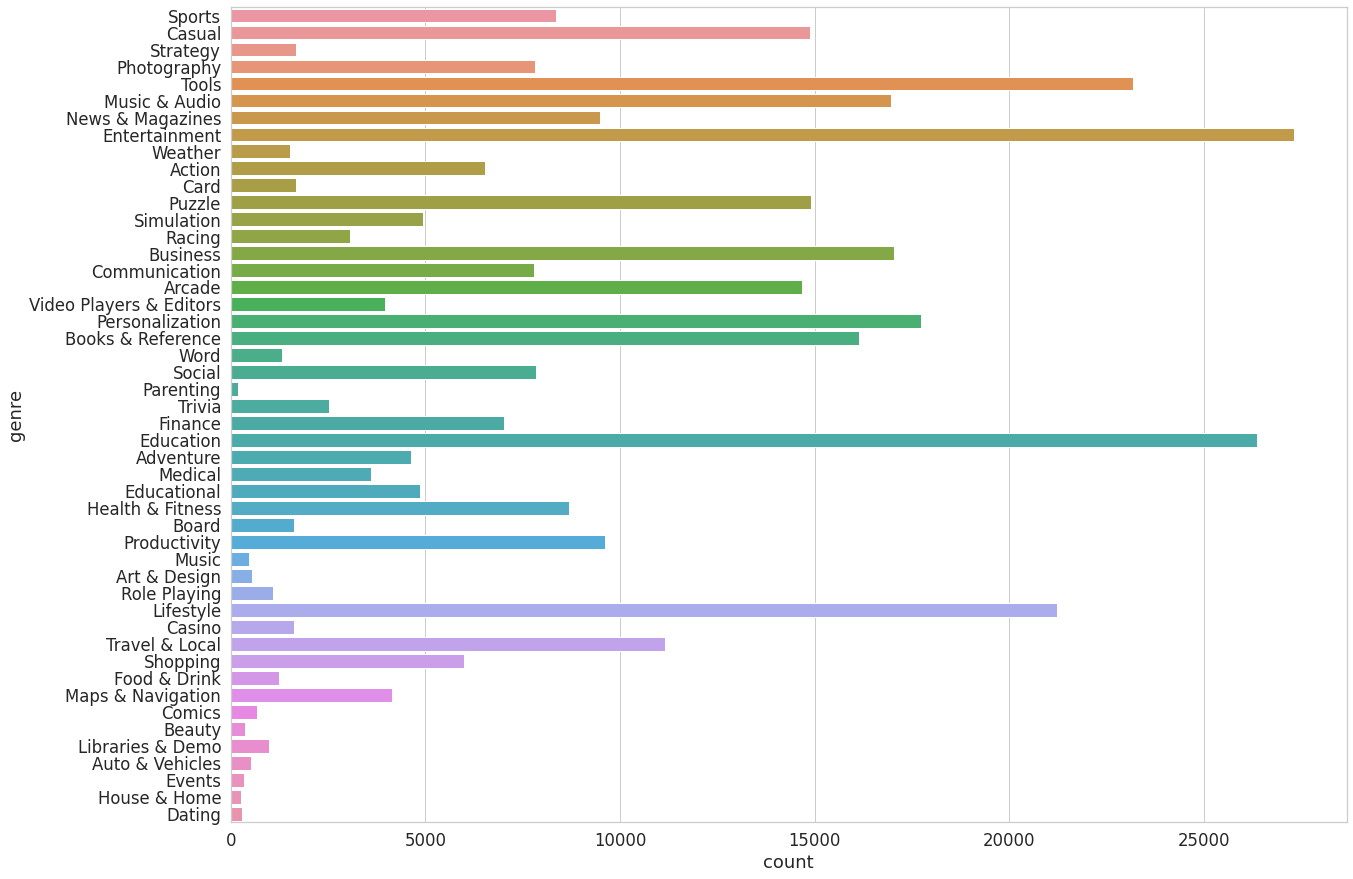

In [15]:
plt.figure(figsize=(20,15))
ax = sns.countplot(y='genre', data=df)

In [16]:
# let's look at the apps in the data 
df.title.value_counts().head(20)

Flashlight               119
Tic Tac Toe              102
Bubble Shooter            53
Calculator                52
BMI Calculator            51
FlashLight                49
2048                      47
Unit Converter            45
Currency Converter        45
Sudoku                    41
Age Calculator            39
Compass                   39
Call Recorder             38
Music Player              38
Love Calculator           35
Solitaire                 35
Flash Light               34
Tip Calculator            32
Animal Sounds             30
Caller Name Announcer     26
Name: title, dtype: int64

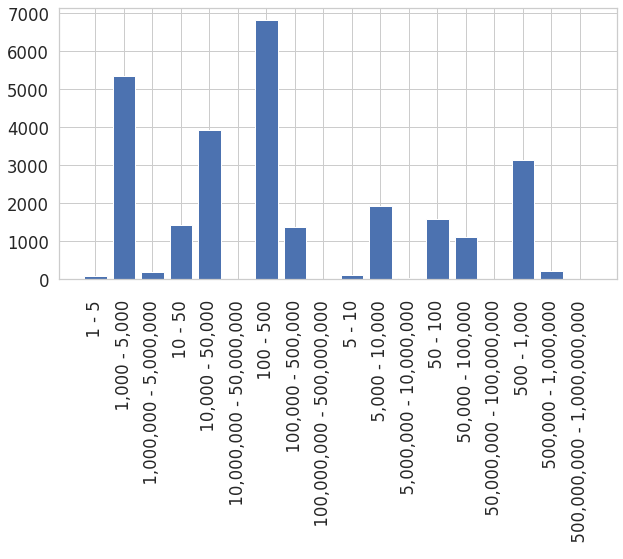

In [17]:
Install_list = list(df.groupby(['downloads']).groups.keys())
n_count=[]
for str in Install_list:
    n_count.append(df[(df['store_rating']==4) & (df['downloads']==str)].shape[0])
plt.bar(np.arange(len(Install_list)),np.array(n_count))
plt.xticks(np.arange(len(Install_list)), Install_list,rotation='vertical')
plt.show()

<p class="alert alert-block alert-success" We can see that's the app's have installations between 1000-5000 has rating 4 and between 100-500 have rating 5.
 This illustrates that when we have more than 5000 reviews, the distribution of the "store ranting" becomes more diverse

<p class="alert alert-block alert-success"> We can see that's the app's have installations between 1000-5000 has rating 4 and between 100-500 have rating 5.
 This illustrates that when we have more than 5000 reviews, the distribution of the "store ranting" becomes more diverse

In [18]:
# rounding the store ratings(classification)
df['store_rating']=df['store_rating'].apply(lambda x: int(round(x,0)))

In [19]:
df["store_rating"].describe()

count    348733.000000
mean          4.081521
std           0.832515
min           1.000000
25%           4.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: store_rating, dtype: float64

# Is Google Bias ??


Text(0.5, 1.0, 'Distribution of Rating')

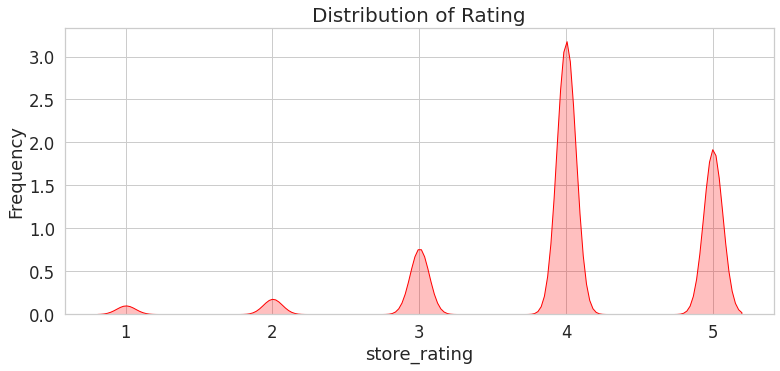

In [20]:
# rating distribution
from pylab import rcParams

rcParams['figure.figsize'] = 12.7, 5.27
g = sns.kdeplot(df.store_rating, color="Red", shade = True)
g.set_xlabel("store_rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

<p class="alert alert-block alert-success"> Most important things about apps are there rating we even didn't see the app's whose ratings are less than 3.5. Before downloading the app first we see the rating of app if the app rating is more than 4 than we say that yeah this is a good category of app then after we see other attribute of apps. Very fewer people see the review's of the app.
That's why the data distribution look's biased to apps that have rating more than 3.5